<a href="https://colab.research.google.com/github/teddy4445/ga_physics/blob/main/joint_automl_pred_vs_true_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [1]:
# set a func for plotting predictions and trend line

def y_test_vs_y_pred(file_path: str,
                     exp_name: str,
                     exp_color: str,
                     marker_shape: str,
                     n_samples: int):
    # sort predictions in ascending order
    data = pd.read_csv(file_path)
    data = data.sort_values(by="y_pred")  
    
    # plot actual y_pred = f(y_true) relation
    y_test = np.array(data["y_true"]).reshape(-1, 1)
    lg = LinearRegression().fit(y_test, data["y_pred"])
    r2 = lg.score(y_test, data["y_pred"])
    plt.plot([min(y_test), max(y_test)],
              [lg.predict([min(y_test)])[0], lg.predict([max(y_test)])[0]],
              ":",
              color=exp_color,
              linewidth=4,
              alpha=0.5,
              label=exp_name + " : $R^2$ = " + str(round(r2, 2)) + " | $f_{pred} = " + 
                    str(round(lg.coef_[0], 2)) + "\cdot f_{true}" + " + " + str(round(lg.intercept_, 2)) + "$")
    
    # pick n_sample to present, spread across the whole data range 
    samples = pd.DataFrame()
    range_edges = [1/n_samples * (i+1) for i in range(n_samples)]
    for edge in range_edges:
        indices = data.where( data < edge ).dropna().index
        samples = samples.append(data.loc[indices, :].sample(n=1))
        data = data.drop(indices)

    # plot predictions against true values
    y_test = np.array(samples["y_true"]).reshape(-1, 1)
    plt.scatter(x=y_test,
                y=samples["y_pred"],
                color=exp_color,
                marker=marker_shape,
                s=90,
                alpha=0.75)

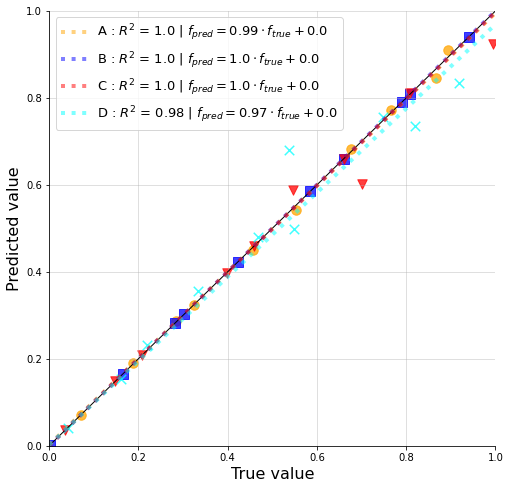

In [ ]:
# choose ho many samples to present
n_samples = 10

# plot y_pred = y_true for refferance
fig = plt.figure(figsize=(8, 8)) 
plt.plot([0,1],
         [0,1],
         "-",
         color="black",
         linewidth=1)

# plot predictions of experiment A-D:
y_test_vs_y_pred(file_path="results/constant_acceleration_results/400_samples/tpot_target_vs_pred.csv", # exp A
                 exp_name="A",
                 exp_color="orange",
                 marker_shape="o", 
                 n_samples=n_samples)
y_test_vs_y_pred(file_path="results/steady_fall_case_3_results_10k_samples/tpot_target_vs_pred.csv",    # exp B
                 exp_name="B",
                 exp_color="blue", 
                 marker_shape=",",
                 n_samples=n_samples)
y_test_vs_y_pred(file_path="results/steady_fall_case_2_results_10k_samples/tpot_target_vs_pred.csv",    # exp C
                 exp_name="C",
                 exp_color="red", 
                 marker_shape="v",
                 n_samples=n_samples)
y_test_vs_y_pred(file_path="results/steady_fall_case_1_results/10k_samples_without_V/tpot_target_vs_pred.csv", # exp D
                 exp_name="D",
                 exp_color="cyan", 
                 marker_shape="x",
                 n_samples=n_samples)

# set parameters and save plot
plt.xlim((0,1))
plt.ylim((0,1))
plt.xlabel("True value", fontsize=16)
plt.ylabel("Predicted value", fontsize=16)
plt.legend(frameon=True, fontsize=13)
plt.grid(alpha=0.5)
ax = plt.gca()
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig("joint_tpot_plot.pdf", dpi=600)
plt.show()